<style type="text/css">
    .formula {
        background: #f7f7f7;
        border-radius: 50px;
        padding: 15px;
    }
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

# Teoría del Error
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>

## Redondeo
En matemáticas el redondeo es una técnica que nos permite conseguir una representación inexacta de un valor real, pero con algún grado de fidelidad como para ser útil en algún propósito específico.

### Agenda
1. Cifras significativas
1. Aproximación
1. Truncamiento



In [1]:
# Importando librerías del cuaderno de jupyter
from math import pi, e, sqrt, log, floor, ceil, trunc
import numpy as np
import pylab as pl

## 1. Cifras significativas
----
Las cifras significativas de un número son aquellos dígitos que han sido elegidos para utilizarse en forma confiable, de forma que sobre ellos no existe incertidumbre.

In [2]:
# Formato de numero para ver cifras significativas
x = 1.24
y = 0.0000005
z = 0.000536
print(f"| {x}        | {y}     | {z}  |")
print(f"| {x:7.7f}   | {y:7.7f} | {z:7.7f} |")
print(f"| {x:7.3e}   | {y:7.3e} | {z:7.3e} |")

| 1.24        | 5e-07     | 0.000536  |
| 1.2400000   | 0.0000005 | 0.0005360 |
| 1.240e+00   | 5.000e-07 | 5.360e-04 |


In [3]:
# Precio del Xiomi MI10T Pro-128GB
Precio_xiomi_euros = 699         # Euros
Valor_euro = 4_306.93
Número_alumnos = 30
Precio_xiomi = Precio_xiomi_euros * Valor_euro
Costo_telefonos_1 = Número_alumnos * Precio_xiomi
print(Costo_telefonos_1)
print(f"Precio Xiomi [1 Unid]   :      {Precio_xiomi:,.2f}  :  {type(Precio_xiomi)}")
print(f"Precio Xiomi [{Número_alumnos} Unid]  :     {Costo_telefonos_1:,.2f}  :  {type(Costo_telefonos_1)}")

90316322.10000001
Precio Xiomi [1 Unid]   :      3,010,544.07  :  <class 'float'>
Precio Xiomi [30 Unid]  :     90,316,322.10  :  <class 'float'>


In [4]:
#  Cifras significativas del costo de Xiomi MI10T Pro-128GB
Cifras_costo_1 = len(str(int(Costo_telefonos_1)))
print(f"Cifras Significativas Costo:      {Cifras_costo_1}")

Cifras Significativas Costo:      8


## 2. Aproximación
----
Es el proceso de sumar o restar valores para reducir el número de cifras significativas en la expresión decimal

In [5]:
# Precio de 30 iPhone 12-128GB en fallabella
Precio_iphone = 5_199_900       # Presos Colombianos
Costo_telefonos_2 = Número_alumnos * Precio_iphone

print(f"Precio Xiomi [1 Unid]   :      {Precio_xiomi:,.2f}  :  {type(Precio_xiomi)}")
print(f"Precio iphone [1 Unid]  :      {Precio_iphone:_.2f}  :  {type(Precio_iphone)}")
print(f"Precio Xiomi [{Número_alumnos} Unid]  :     {Costo_telefonos_1:,.2f}  :  {type(Costo_telefonos_1)}")
print(f"Precio iphone [{Número_alumnos} Unid] :    {Costo_telefonos_2:,.2f}  :  {type(Costo_telefonos_2)}")

Precio Xiomi [1 Unid]   :      3,010,544.07  :  <class 'float'>
Precio iphone [1 Unid]  :      5_199_900.00  :  <class 'int'>
Precio Xiomi [30 Unid]  :     90,316,322.10  :  <class 'float'>
Precio iphone [30 Unid] :    155,997,000.00  :  <class 'int'>


In [6]:
# Calculo del Sobrecosto de iPhone 12 vs Xiomi MI10T (todas las cifras significativas)
Sobrecosto = Costo_telefonos_2 - Costo_telefonos_1
Porcetaje_sobrecosto = 100 * ((Costo_telefonos_1 - Sobrecosto) / Sobrecosto)
print(f"Precio Xiomi [{Número_alumnos} Unid]  :     {Costo_telefonos_1:,.2f}  :  {type(Costo_telefonos_1)}")
print(f"Precio iphone [{Número_alumnos} Unid] :    {Costo_telefonos_2:,.2f}  :  {type(Costo_telefonos_2)}")
print("-----------------------------------------------------------------")
print(f"Sobrecosto {Número_alumnos} iphone    :     {Sobrecosto:,.2f}  [Pesos]")
print(f"Sobrecosto en porcentaje:             {Porcetaje_sobrecosto:,.2f}  [  %  ]")

Precio Xiomi [30 Unid]  :     90,316,322.10  :  <class 'float'>
Precio iphone [30 Unid] :    155,997,000.00  :  <class 'int'>
-----------------------------------------------------------------
Sobrecosto 30 iphone    :     65,680,677.90  [Pesos]
Sobrecosto en porcentaje:             37.51  [  %  ]


In [7]:
#  Cifras significativas del costo de los celulares Xiomi MI10T Iphone 12 de 128GB 
Cifras_costo_2 = len(str(int(Costo_telefonos_2)))
print(f"Cifras Significativas Costo 1:      {Cifras_costo_1}")
print(f"Cifras Significativas Costo 2:      {Cifras_costo_2}")


Cifras Significativas Costo 1:      8
Cifras Significativas Costo 2:      9


In [8]:
# Reducción de cifras significativas
Cifras_significativas = 3
Cifras_eliminar_1 = Cifras_costo_1 - Cifras_significativas
Cifras_eliminar_2 = Cifras_costo_2 - Cifras_significativas
Costo_aprox_1 = round(Costo_telefonos_1/(10 ** Cifras_eliminar_1), 0)*(10**Cifras_eliminar_1)
Costo_aprox_2 = round(Costo_telefonos_2/(10 ** Cifras_eliminar_2), 0)*(10**Cifras_eliminar_2)
Variacion_1 =  Costo_aprox_1 - Costo_telefonos_1
Variacion_2 =  Costo_aprox_2 - Costo_telefonos_2
Variacion_porcentual_1 =  100 * (Variacion_1 / Costo_telefonos_1)
Variacion_porcentual_2 =  100 * (Variacion_2 / Costo_telefonos_2)
print(f"          |        Costo Real |  Costo aproximado |       Variación |     %     |")
print(f"Costo 1:  |    {Costo_telefonos_1:14,.2f} |    {Costo_aprox_1:14,.2f} |    {Variacion_1:12,.2f} |   {Variacion_porcentual_1:,.2f}%  |")
print(f"Costo 2:  |    {Costo_telefonos_2:14,.2f} |    {Costo_aprox_2:14,.2f} |    {Variacion_2:12,.2f} |    {Variacion_porcentual_2:,.2f}%  |")

          |        Costo Real |  Costo aproximado |       Variación |     %     |
Costo 1:  |     90,316,322.10 |     90,300,000.00 |      -16,322.10 |   -0.02%  |
Costo 2:  |    155,997,000.00 |    156,000,000.00 |        3,000.00 |    0.00%  |


In [9]:
# Calculo del Sobrecosto de iPhone 12 vs Xiomi MI10T (reducción de cifras significativas)
Sobrecosto_aprox = Costo_aprox_2 - Costo_aprox_1
Porcetaje_sobrecosto_aprox = 100 * ((Costo_aprox_1 - Sobrecosto_aprox) / Sobrecosto_aprox)
print(f"Sobrecosto {Número_alumnos} iphone    :     {Sobrecosto_aprox:,.2f}  [Pesos]")
print(f"Sobrecosto en porcentaje:             {Porcetaje_sobrecosto_aprox:,.2f}  [  %  ]")

Sobrecosto 30 iphone    :     65,700,000.00  [Pesos]
Sobrecosto en porcentaje:             37.44  [  %  ]


In [10]:
# Variación del sobrecosto al reducir las cifras significativas
Delta_de_sobreosto = Porcetaje_sobrecosto - Porcetaje_sobrecosto_aprox
print(f"Variacion del sobrecosto:             {Delta_de_sobreosto:,.2f}  [  %  ]")

Variacion del sobrecosto:             0.07  [  %  ]


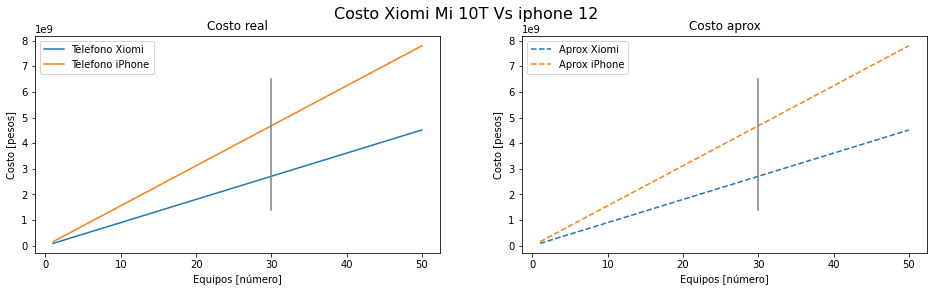

In [11]:
# Variación del sobrecosto con el número de equipos
Numero = np.linspace(1, 50, 50)
y1 = Numero * Costo_telefonos_1
y2 = Numero * Costo_telefonos_2
y3 = Numero * Costo_aprox_1
y4 = Numero * Costo_aprox_2

fig, ax = pl.subplots(1, 2)
fig.set_size_inches(16, 4)
fig.suptitle('Costo Xiomi Mi 10T Vs iphone 12', fontsize=16)

ax[0].plot(Numero, y1, label="Telefono Xiomi")
ax[0].plot(Numero, y2, label="Telefono iPhone")
ax[0].axvline(x = Número_alumnos, ymin=0.2, ymax=0.8, color="gray")
ax[0].set_title("Costo real")
ax[0].set_xlabel("Equipos [número]")
ax[0].set_ylabel("Costo [pesos]")
ax[0].legend()

ax[1].plot(Numero, y3, "--", label="Aprox Xiomi")
ax[1].plot(Numero, y4, "--", label="Aprox iPhone")
ax[1].axvline(x = Número_alumnos, ymin=0.2, ymax=0.8, color="gray")
ax[1].set_title("Costo aprox")
ax[1].set_xlabel("Equipos [número]")
ax[1].set_ylabel("Costo [pesos]")
ax[1].legend()

pl.show()

In [12]:
# Cifras significativas y aproximación de números irracionales
x1 = (1 + sqrt(5)) / 2
x2 = e
x3 = pi

# Métodos de aproximación
y1 = round(x3, 3)
y2 = floor(x3 * 1000) / 1000
y3 = ceil(x3 * 1000) / 1000

print('Número áureo: ', x1)
print('Número euler: ', x2)
print('Número pi: ', x3)
print('redondear 1: ', y1)
print('redondear 2: ', y2)
print('redondear 3: ', y3)

Número áureo:  1.618033988749895
Número euler:  2.718281828459045
Número pi:  3.141592653589793
redondear 1:  3.142
redondear 2:  3.141
redondear 3:  3.142


## 3. Truncamiento
---
Es el proceso de descartar cifras en la expresión decimal

In [13]:
# Truncamiento por representación de números en coma flotante
x1 = 0.1
x2 = 0.2
X3 = x1 + x2
x4 = pow(sqrt(2), 2)

y1 = x1 + x2
y2 = floor(y1*10)/10
y3 = x4
y4 = floor(y3 * 10) / 10

print('Error coma flotante 1: ', y1)
print('tratamiento error   1: ', y2)
print('Error coma flotante 2: ', y3)
print('tratamiento error   2: ', y4)

Error coma flotante 1:  0.30000000000000004
tratamiento error   1:  0.3
Error coma flotante 2:  2.0000000000000004
tratamiento error   2:  2.0


In [14]:
# Truncamiento intencionado
x1 = -7.4

y1 = int(x1)
y2 = trunc(x1)
y3 = floor(x1)

print('Truncar 1: ', y1)
print('Truncar 2: ', y2)
print('Truncar 3: ', y3)

Truncar 1:  -7
Truncar 2:  -7
Truncar 3:  -8


### **EJEMPLO:** Transmision por fibra optica monomodo

![attenuation](img/map_attenuation_big.png)

In [15]:
# Variación de los resultados por truncamiento de variables en valores finales
# Transmisión por fibra óptica monomodo en condiciones ideales
# Calculo de la frecuencia y atenuación
# --------------------------------------
λ = 1490e-9                             # longitud de onda de tx  de la tercera ventana [m] (1490 nm)
Potencia = 10                           # Potencia modulo de Tx fibra [dbm]
Sensibilidad = -35                      # Sensibilidad modulo de Tx fibra [dbm]
# --------------------------------------
v = 204e6                               # Velocidad de la luz en la fibra óptica [m] (204 Km/ms)
α = -0.25                               # Atenuación por kilometro en la segunda ventana [db/km]
n = 1.47                                # Indice típico de refracción de la luz en la fibra
f = trunc(2 * n * (v/λ) * (1/1e12))     # frecuencia [Thz]
# --------------------------------------
Distancia = 826_000                     # Pasto - Bogotá
t_o = (Distancia / v) * (1000)          # Tiempo de ida [ms]
# --------------------------------------
A_o = (10**((Potencia-30)/10))*1e3      # Potencia módulo de Tx fibra [mW]
S = (10**((Sensibilidad-30)/10))*1e9    # Potencia mínima de Rx fibra [uW]
print(f"-------------------------------------------------------------------------------------")
print(f"  Frecuencia:                     {f:7.2f} Thz")
print(f"  Distancia recorrida:            {2 * Distancia/1000:7.2f} Km")
print(f"  Tiempo de llegada portadora:    {2 * t_o:7.2f} ms")
print(f"  Potencia de salida:             {Potencia:7.0f} dBm / {A_o:3.0f} mW")
print(f"  Potencia minima:                {Sensibilidad:7.0f} dBm / {S:3.0f} uW")
# --------------------------------------
t1 = np.linspace(t_o, t_o + 0.01, 512)   # Tiempo Pasto - Bogotá [ms]
t2 = 2 * t1                              # Tiempo Pasto - Bogotá - Pasto [ms]
# --------------------------------------

# Valores reales
vre = e**(α*t1)
vrp = 2 * pi * f

# Valores truncados
vte = trunc(e)**(α*t1)
vtp = 2 * trunc(pi) * f

# Funciones de respuesta (amplitud Vs tiempo) 
s1 = A_o * vre * (np.sin(2 * vrp * t1) + np.sin(6 * vrp * t1)/3 + np.sin(10 * vrp * t1)/5)
s2 = A_o * vte * (np.sin(2 * vtp * t1) + np.sin(6 * vtp * t1)/3 + np.sin(10 * vtp * t1)/5)

# Máximos
M1 = s1.max()
M2 = s2.max()
dBm1 = 10 * log((M1/1000), 10)
dBm2 = 10 * log((M2/1000), 10)

# Variaciones
print(f"  Potencia 1 de llegada:          {dBm1:7.0f} dBm / {M1:3.0f} uW")
print(f"  Potencia 2 de llegada:          {dBm2:7.0f} dBm / {M2:3.0f} uW")
print(f"-------------------------------------------------------------------------------------")
print(f"|  Valor e   | {e} |  {trunc(e)}  ->  Delta α  |  {M1:5.2e} uW   | {M2:5.2e} uW  |")
print(f"|  Valor pi  | {pi} |  {trunc(pi)}  ->  Delta f  |  {vrp:5.2e} Thz  | {vtp:5.2e} Thz |")
print(f"-------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------
  Frecuencia:                      402.00 Thz
  Distancia recorrida:            1652.00 Km
  Tiempo de llegada portadora:       8.10 ms
  Potencia de salida:                  10 dBm /  10 mW
  Potencia minima:                    -35 dBm / 316 uW
  Potencia 1 de llegada:              -25 dBm /   3 uW
  Potencia 2 de llegada:              -23 dBm /   5 uW
-------------------------------------------------------------------------------------
|  Valor e   | 2.718281828459045 |  2  ->  Delta α  |  3.39e+00 uW   | 4.63e+00 uW  |
|  Valor pi  | 3.141592653589793 |  3  ->  Delta f  |  2.53e+03 Thz  | 2.41e+03 Thz |
-------------------------------------------------------------------------------------


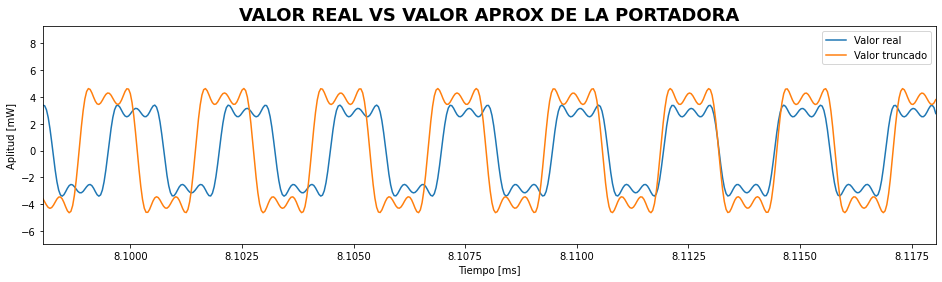

In [16]:
# Creación de la figura de MatplotLib
fig, ax = pl.subplots()
fig.set_size_inches(16, 4)

# Gráficas de valor real y truncado
ax.plot(t2, s1, label="Valor real")
ax.plot(t2, s2, label="Valor truncado")
pl.xlim(t2.min(), t2.max())
pl.ylim(s2.min() * 1.5, s2.max() * 2)

# Agregamos Texto
pl.title("Valor real Vs Valor aprox de la portadora".upper(), fontsize=18, fontweight="bold")
pl.xlabel("Tiempo [ms]")
pl.ylabel("Aplitud [mW]")
pl.legend()
pl.show()

---
## Mas Recursos

- [Cifras significativas](https://es.wikipedia.org/wiki/Cifras_significativas) (en Wikipedia)
- [Redondeo](https://es.wikipedia.org/wiki/Redondeo) (en Wikipedia)
- [Truncamiento](https://es.wikipedia.org/wiki/Truncamiento) (en Wikipedia)
